In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("MataraArima1.csv",parse_dates=['Month'],index_col=['Month'])

In [4]:
df.head()

,Production/kg
Month,
2016-01-01,3102903.0
2016-02-01,2822829.0
2016-03-01,1990515.0
2016-04-01,2847736.0
2016-05-01,3209612.0


In [5]:
ts=df['Production/kg'].resample('MS').sum()

In [6]:
ts.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 84 entries, 2016-01-01 to 2022-12-01
Freq: MS
Series name: Production/kg
Non-Null Count  Dtype  
--------------  -----  
84 non-null     float64
dtypes: float64(1)
memory usage: 1.3 KB


In [6]:
ts.head()

Month
2016-01-01    3102903.0
2016-02-01    2822829.0
2016-03-01    1990515.0
2016-04-01    2847736.0
2016-05-01    3209612.0
Freq: MS, Name: Production/kg, dtype: float64

<Axes: xlabel='Month'>

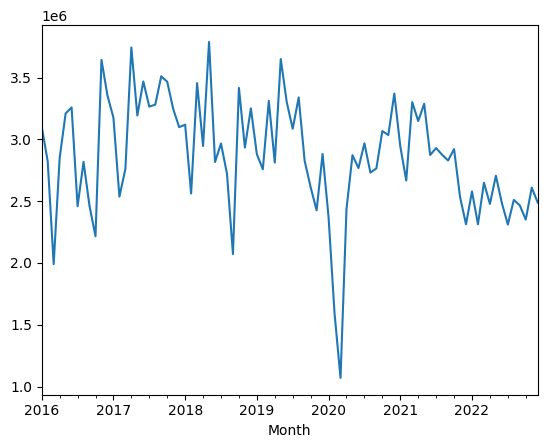

In [7]:
ts.plot()

## Rolling Statistics

In [10]:
def plot_graph(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    
    orig = plt.plot(ts,label='Original')
    mean = plt.plot(rolmean,label='Rolling mean')
    std = plt.plot(rolstd,label = 'Rolling std')
    
    plt.legend(loc = 'best')
    plt.show()

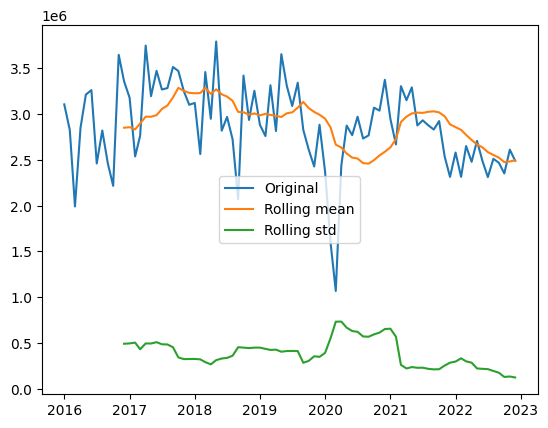

In [11]:
plot_graph(ts)

In [8]:
import statsmodels.api as sm

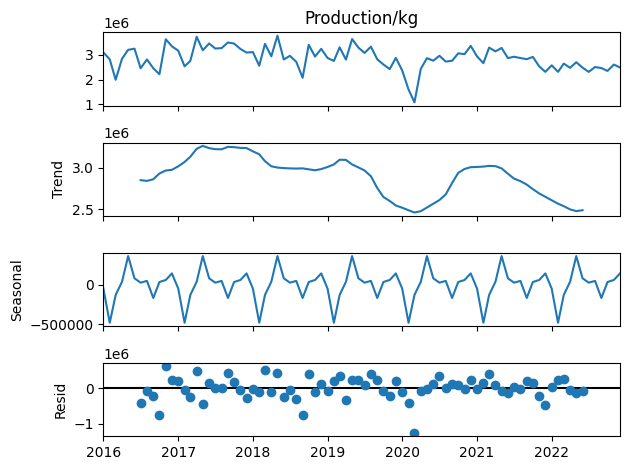

In [9]:
decomposition = sm.tsa.seasonal_decompose(ts,model='additive')
fig = decomposition.plot()
plt.show()

## Addfuller Test

In [12]:
def adcf_test(timeseries):
    from statsmodels.tsa.stattools import adfuller

    dftest = adfuller(timeseries)

    print(dftest)

    

In [13]:
adcf_test(ts)

(-2.315738136288146, 0.16694233762659838, 5, 78, {'1%': -3.517113604831504, '5%': -2.8993754262546574, '10%': -2.5869547797501644}, 2029.1619116344314)


In [17]:
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    
    
    orig = plt.plot(ts,label='Original')
    mean = plt.plot(rolmean,label='Rolling mean')
    std = plt.plot(rolstd,label = 'Rolling std')
    
    plt.legend(loc = 'best')
    plt.show()

    from statsmodels.tsa.stattools import adfuller

    dftest = adfuller(timeseries)
    dfoutput = pd.Series(dftest[0:4],index = ['The Test statstics','Mackinnons approximate p-value','#usedLags','NOBS'])
    print(dfoutput)


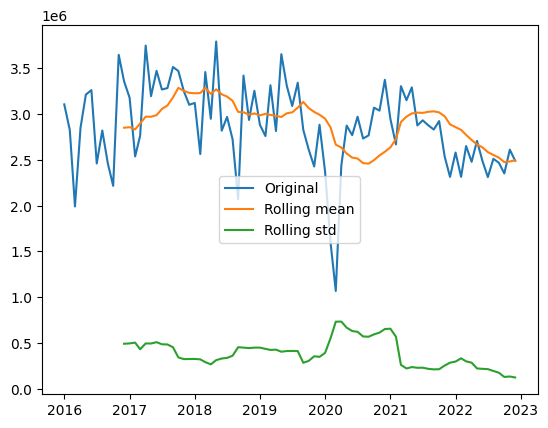

The Test statstics                -2.315738
Mackinnons approximate p-value     0.166942
#usedLags                          5.000000
NOBS                              78.000000
dtype: float64


In [18]:
test_stationarity(ts)

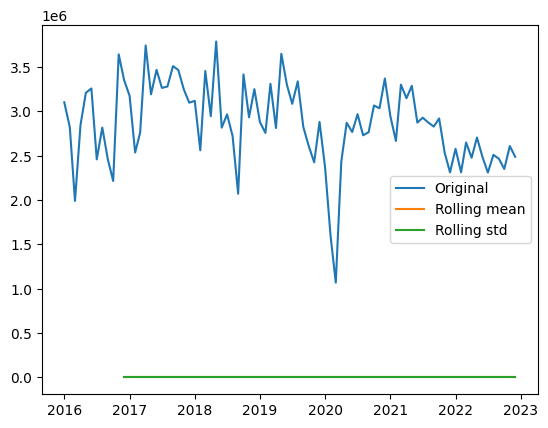

The Test statstics                -5.437517
Mackinnons approximate p-value     0.000003
#usedLags                          0.000000
NOBS                              83.000000
dtype: float64


In [19]:
import numpy as np

production_data_log_scaled = np.log(ts)
test_stationarity(production_data_log_scaled)


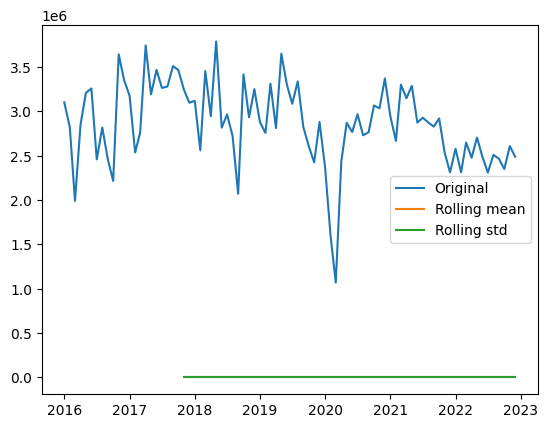

The Test statstics                -4.888277
Mackinnons approximate p-value     0.000037
#usedLags                          0.000000
NOBS                              72.000000
dtype: float64


In [21]:
ma = production_data_log_scaled.rolling(window=12).mean()
production_data_log_scaled_minus_ma = production_data_log_scaled - ma

production_data_log_scaled_minus_ma.dropna(inplace=True)
test_stationarity(production_data_log_scaled_minus_ma)



In [24]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf


from statsmodels.graphics.tsplots import plot_acf
from statsmodels.graphics.tsplots import plot_pacf

lag_acf = acf(production_data_log_scaled_minus_ma)
lag_pacf = pacf(production_data_log_scaled_minus_ma)

plot_acf(lag_acf)
plot_pacf(lag_pacf)

ModuleNotFoundError: No module named 'statsmodels.graphics.tsplots'

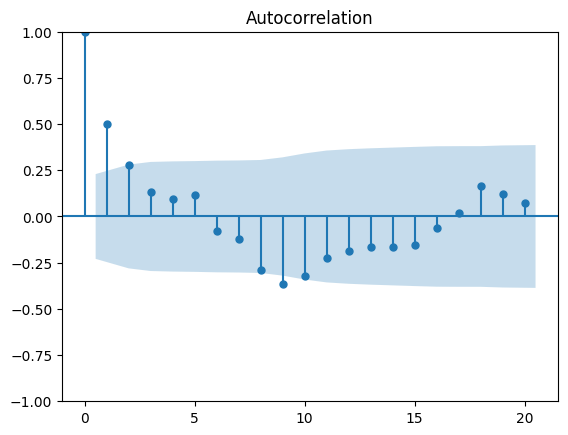

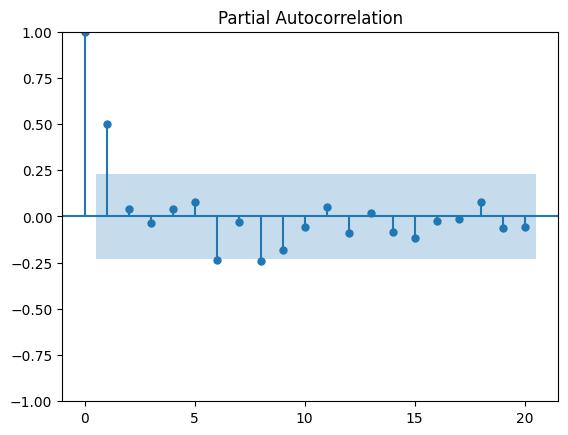

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Directly plot the ACF and PACF for the time series data
plot_acf(production_data_log_scaled_minus_ma, lags=20)
plt.show()

plot_pacf(production_data_log_scaled_minus_ma, lags=20)
plt.show()


C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\RANASINGHE\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ

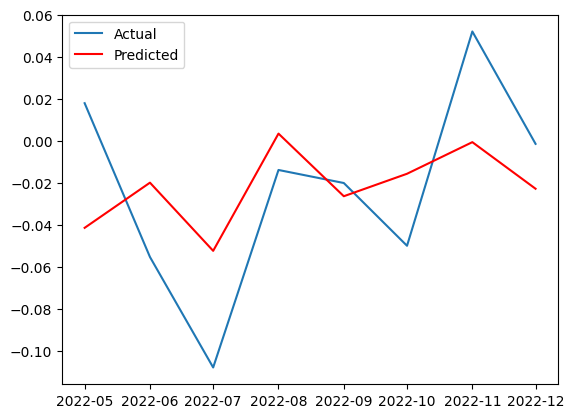

In [43]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
train, test = train_test_split(production_data_log_scaled_minus_ma, test_size=0.10, shuffle=False)

# Fit the ARIMA model on the training data
model_arima = ARIMA(train, order=(6, 1, 3))
model_arima_fit = model_arima.fit()

# Make predictions
predictions = model_arima_fit.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# If you want to plot the predictions against the actual values
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', color='red')
plt.legend()
plt.show()


In [32]:
test.head()

Month
2022-05-01    0.017889
2022-06-01   -0.055375
2022-07-01   -0.107998
2022-08-01   -0.013919
2022-09-01   -0.020133
Freq: MS, Name: Production/kg, dtype: float64

In [33]:
test.tail()

Month
2022-08-01   -0.013919
2022-09-01   -0.020133
2022-10-01   -0.050028
2022-11-01    0.052048
2022-12-01   -0.001481
Freq: MS, Name: Production/kg, dtype: float64

In [46]:
from sklearn.metrics import mean_squared_error
error3 = mean_squared_error(test,predictions)
print('TestMSE: %0.3f' %error3)


TestMSE: 0.002


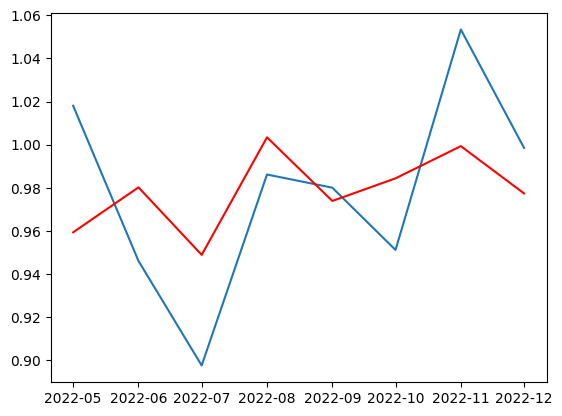

In [35]:
predict = np.exp(predictions)
test_set = np.exp(test)
plt.plot(test_set)
plt.plot(predict, color = 'red')
plt.show()

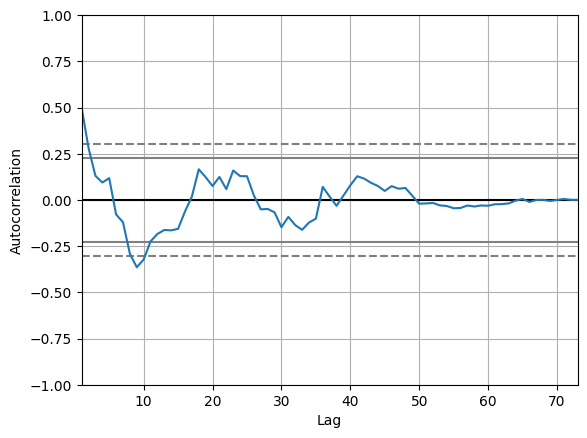

In [44]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(production_data_log_scaled_minus_ma)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
addtest=adfuller(ts)

In [12]:
print('pvalue of adfuller test is: ',addtest[1])

pvalue of adfuller test is:  0.16694233762659838


In [13]:
len(ts)

84

In [14]:
train=ts[:64]
test=ts[64:]

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model = ARIMA(train, order=(1, 0, 1)).fit()

In [17]:
pred=model.predict(start=len(train),end=(len(ts)-1))

In [18]:
len(train),(len(ts)-1)

(64, 83)

In [19]:
pred.head()

2021-05-01    3.030847e+06
2021-06-01    2.987444e+06
2021-07-01    2.964102e+06
2021-08-01    2.951548e+06
2021-09-01    2.944796e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
error=np.sqrt(mean_squared_error(test,pred))
error

398437.5287211319

In [22]:
mape1 = np.mean(np.abs((test - pred) / test)) * 100


In [23]:
print(f'Mean Absolute Percentage Error (MAPE): {mape1:.2f}%')


Mean Absolute Percentage Error (MAPE): 13.96%


In [24]:
test.mean(),np.sqrt(test.var())

(2625344.1, 258721.4982967918)

<Axes: xlabel='Month'>

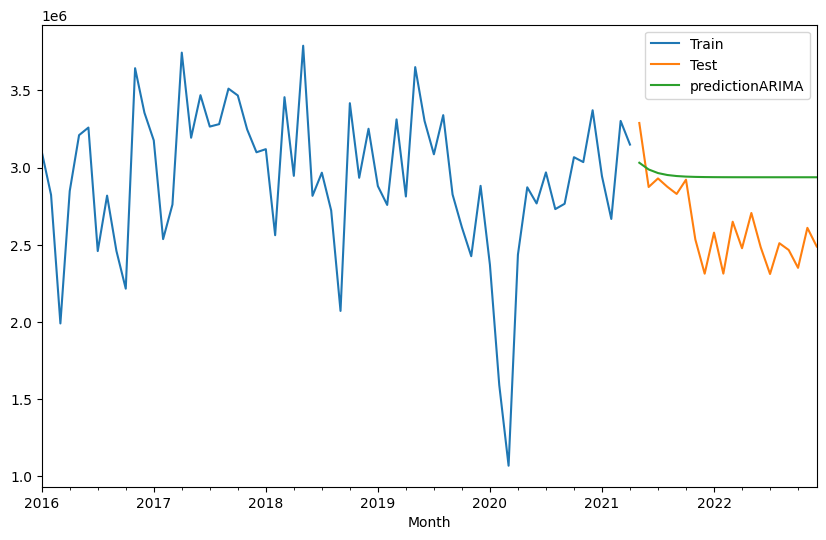

In [25]:
train.plot(legend=True,label='Train',figsize=(10,6))
test.plot(legend=True,label='Test')
pred.plot(legend=True,label='predictionARIMA')

In [26]:
import itertools

In [27]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [28]:
pdq_combination=list(itertools.product(p,d,q))

In [29]:
len(pdq_combination)

128

In [30]:
rmse=[]
order1=[]

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
for pdq in pdq_combination:
    try:
        model=ARIMA(train,order=pdq).fit()
        pred=model.predict(start=len(train),end=(len(ts)-1))
        error=np.sqrt(mean_squared_error(test,pred))
        order1.append(pdq)
        rmse.append(error)
    except:
        continue

In [33]:
results=pd.DataFrame(index=order1,data=rmse,columns=['RMSE'])

In [34]:
results.to_csv('MataraArima_ARIMA_result.csv')

In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the model
model2 = ARIMA(train, order=(6, 1, 3)).fit()


In [36]:
pred2=model2.predict(start=len(train),end=(len(ts)-1))

In [37]:
pred2.head()

2021-05-01    3.042853e+06
2021-06-01    2.922596e+06
2021-07-01    2.971880e+06
2021-08-01    3.011557e+06
2021-09-01    2.861623e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [38]:
pred2.tail()

2022-08-01    2.799965e+06
2022-09-01    2.778585e+06
2022-10-01    2.795662e+06
2022-11-01    2.771905e+06
2022-12-01    2.783549e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [39]:
error2=np.sqrt(mean_squared_error(test,pred2))
error2

303157.60976784985

In [40]:
mape2 = np.mean(np.abs((test - pred2) / test)) * 100


In [41]:
print(f'Mean Absolute Percentage Error (MAPE): {mape2:.2f}%')

Mean Absolute Percentage Error (MAPE): 10.36%


In [42]:
final_model=ARIMA(ts,order=(6,1,3)).fit()

In [43]:
prediction2=final_model.predict(len(ts),len(ts)+6)

<Axes: xlabel='Month'>

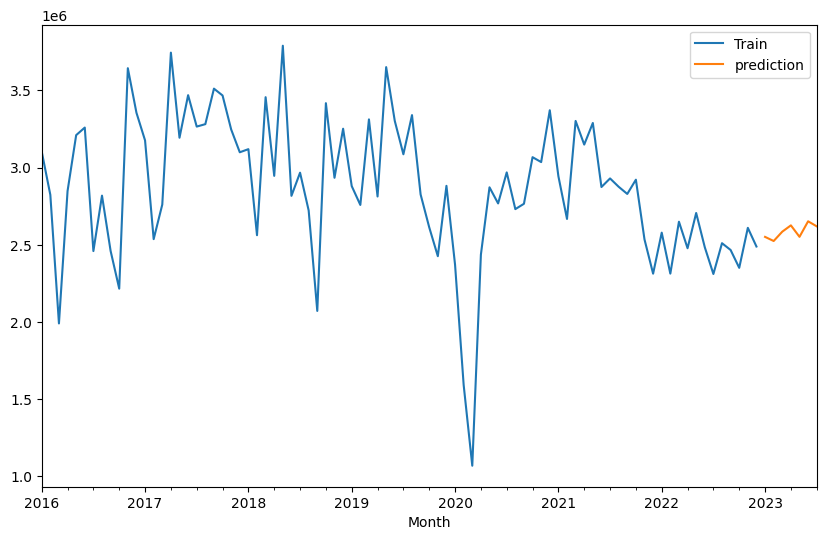

In [44]:
ts.plot(legend=True,label='Train',figsize=(10,6))
prediction2.plot(legend=True,label='prediction')

In [45]:
prediction2.head()

2023-01-01    2.550913e+06
2023-02-01    2.524202e+06
2023-03-01    2.584721e+06
2023-04-01    2.625493e+06
2023-05-01    2.551309e+06
Freq: MS, Name: predicted_mean, dtype: float64

In [46]:
prediction2.tail()

2023-03-01    2.584721e+06
2023-04-01    2.625493e+06
2023-05-01    2.551309e+06
2023-06-01    2.651823e+06
2023-07-01    2.619204e+06
Freq: MS, Name: predicted_mean, dtype: float64